# Visualizing NYC Taxi Trips with Datashader, Altair, and Panel

In this notebook, we create an example dashboard visualizing NYC taxi trip data. The dashboard includes:

- a heatmap of the taxi trips using Holoviews and Datashader
- a histogram of the passenger counts using Altair
- lots of Panel-based widgets for controlling the map aesthetics
- a Holoviews selection stream that links the map x/y ranges to the histogram plot

As the user zooms in/out of the map, the Altair chart updates to show only data currently within the map viewport.

This dashboard is adapted from the [example dashboard](https://examples.pyviz.org/datashader_dashboard/dashboard.html) on the Datashader documentation.


#### References

For more information, see the documentation:

- [Panel User Guide](https://panel.pyviz.org/user_guide/index.html)
- [Panel Reference Gallery](https://panel.pyviz.org/reference/index.html)
    - Includes examples of different types of Panels, e.g., HTML, Markdown, Vega, etc
- [Examples of Panel dashboards from the PyViz team](https://github.com/pyviz-demos)
- [Datashader dashboard documentation](https://examples.pyviz.org/datashader_dashboard/dashboard.html)
    - Including a detailed walk-through of many of the steps used in this dashboard

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import holoviews as hv
import geoviews as gv
import param as pm
import panel as pn
from colorcet import cm
import datashader as ds
from holoviews.operation.datashader import rasterize, shade

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
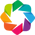

In [2]:
# Enable Altair and Holoviews rendering in the notebook
alt.renderers.enable('notebook')
hv.extension('bokeh')

In [3]:
# Add the Vega extension for Panel
pn.extension('vega')

## Load the full data set

We'll use Pandas to load a data set of over 1 million taxi trips in NYC. The data is available for download
at:

> https://s3.amazonaws.com/datashader-data/nyc_taxi_wide.parq 


**Important** 

If you are working locally, you must download the data and place it in the `data/` folder, but if you are working on Binder, the data should already be available.

In [4]:
# select only a subset of columns
usecols = ['dropoff_x','dropoff_y','pickup_x','pickup_y','dropoff_hour','passenger_count']
DATA = pd.read_parquet('data/nyc_taxi_wide.parq', engine='fastparquet', columns=usecols)

**Note**

We'll load the *full* data above, and when the user changes input parameters, we'll filter the full data set in our app according to those parameters.

## Build the app

We'll define our app as a custom Python class that defines the various components of our dashboard, which include:

- The parameters we want the user to be able to change.
- Functions to generate the various charts/maps in our dashboard, based on those input parameters.
- The dependencies between our chart functions and parameters.

In [5]:
# The colormaps we can choose from
cmaps = ['fire','bgy','bgyw','bmy','gray','kbc']

# Define the options for the basemap tiles that we'll use
opts = dict(xaxis=None, yaxis=None, bgcolor="black", show_grid=False)

In [6]:
class NYCTaxiApp(pm.Parameterized):
    """
    A Panel-based dashboard app visualizing data for over a million 
    NYC taxi trips.
    
    The app has three main components:
        1. A datashaded heatmap of taxi trips
        2. A set of widgets controlling the data plotted on the map
        3. A histogram of the number of passengers  per trip
        
    The histogram is linked to the Holoviews map and only plots the 
    histogram of data currently displayed on the map. 
    """
    # Map opacity
    alpha = pm.Magnitude(default=0.75, doc="Alpha value for the map opacity")
    
    # Colormap 
    cmap = pm.ObjectSelector(cm['fire'], objects={c:cm[c] for c in cmaps})
    
    # Hour
    hour = pm.Range(default=(0, 24), bounds=(0, 24))
    
    # Location to plot
    location = pm.ObjectSelector(default="dropoff", objects=["dropoff", "pickup"])

    # Selection that gives the current x_range/y_range of the map
    box = hv.streams.RangeXY(x_range=None, y_range=None)

    @pm.depends("location", "hour")
    def points(self, x_range=None, y_range=None):
        """
        Get a Holoviews.Points object holding the taxi data. 
        
        Before returning, filter the points by dropoff hour 
        and x/y range.
        """
        # create the Points object holding all data
        xcol = f"{self.location}_x"
        ycol = f"{self.location}_y"
        points = hv.Points(DATA, kdims=[xcol, ycol], vdims=["dropoff_hour"])

        # trim by dropoff hour
        if self.hour != (0, 24):
            points = points.select(dropoff_hour=self.hour)

        # trim by x range of plot
        if x_range is not None:
            points = points.select(**{xcol: x_range})

        # trim by y range of plot
        if y_range is not None:
            points = points.select(**{ycol: y_range})

        return points

    def heatmap(self, **kwargs):
        """
        Return a datashaded heatmap of the taxi trips.
        """

        # create a dynamic map using the points() function
        # and link the box selection stream to the map
        points = hv.DynamicMap(self.points, streams=[self.box])

        # aggregate the points by counting them up on a mesh
        agg = rasterize(points, x_sampling=1, y_sampling=1, width=800, height=400)

        # the background tiles
        tiles = gv.tile_sources.CartoDark().apply.opts(alpha=self.param.alpha, **opts)
        
        # return datashaded heatmap
        heatmap = tiles * shade(agg, cmap=self.param.cmap)
        
        return heatmap.options(
            default_tools=["save", "pan", "box_zoom", "reset"],
            active_tools=["box_zoom"],
            width=600,
            height=400,
        )

    @pm.depends("hour", "box.x_range", "box.y_range")
    def passenger_hist(self):
        """
        Return an Altair histogram showing the number of passengers 
        per trip.
        
        This chart depends on the box selection's x/y range and will be 
        re-drawn when the bounds of the map are updated by the user.
        """

        # get the currently displayed points
        points = self.points(x_range=self.box.x_range, y_range=self.box.y_range)

        # Get the number of trips for different passenger counts
        N = (
            points.data["passenger_count"]
            .value_counts()
            .rename_axis("Passenger Count")
            .reset_index(name="Total Trips")
        )

        # make the Altair chart
        chart = (
            alt.Chart(N)
            .mark_bar()
            .encode(x="Passenger Count", y="Total Trips")
            .properties(width=500, height=300)
        )

        return pn.Pane(chart, width=800)

In [7]:
# initialize our app
app = NYCTaxiApp(name="")

## Layout our Panel object

We will use a combination of the `Column()` and `Row()` objects to create out layout. Also, we can use the `Spacer()` object to explicitly add more blank space of fixed width/height.

In [8]:
title = pn.pane.HTML(
    "<h2>Visualizing NYC Taxi Trips with Datashader, Altair, and Panel</h2>",
    style={"width": "800px", "text-align": "center"},
)
hist_title = pn.pane.HTML(
    "<h3>How Many Passengers Does a Typical Taxi Trip Have?</h3>",
    style={"width": "800px", "text-align": "center"},
)

In [11]:
panel = pn.Column(
    pn.Row(title),
    pn.Row(pn.Param(app.param, expand_button=False, width=200), app.heatmap()),
    pn.Row(hist_title),
    pn.Row(pn.Spacer(width=75), app.passenger_hist),
    align="center",
    width=1200,
)

### Call servable() and render our Panel object

This will do two things: 

1. Render the dashboard in the notebook
2. Enables the notebook to be served from `localhost`. We can execute `panel serve --show app.ipynb` from the command line and see the app live at `http://localhost:5006/app`

In [12]:
panel.servable()

Column(align='center', width=1200)
    [0] Row
        [0] HTML(str, style={'width': '800px', ...})
    [1] Row
        [0] Param(NYCTaxiApp, expand_button=False, width=200)
        [1] HoloViews(DynamicMap)
    [2] Row
        [0] HTML(str, style={'width': '800px', ...})
    [3] Row
        [0] Spacer(width=75)
        [1] ParamMethod(method)